In [16]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../processed_data/data.csv", index_col = 0)

In [2]:
place_name = "Yerevan, Armenia"
graph = ox.graph_from_place(place_name, network_type='walk')

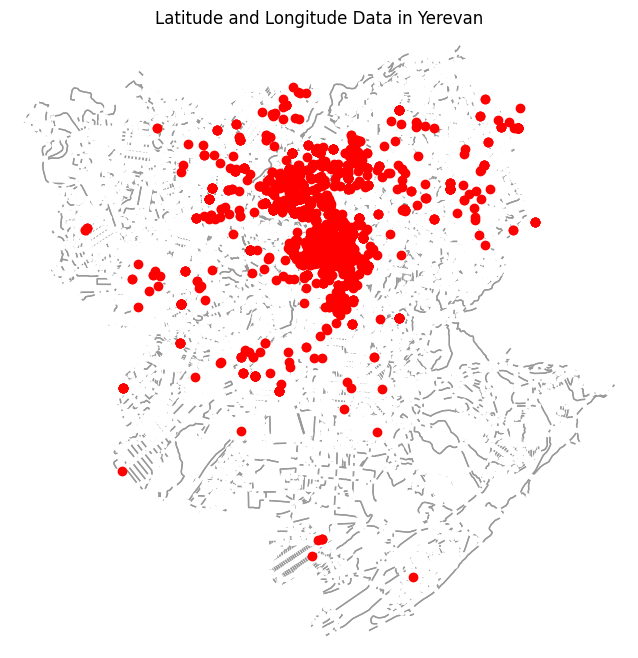

In [3]:
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.title('Latitude and Longitude Data in Yerevan')
plt.axis('off')
ax.scatter(data['latitude'], data['longitude'], c='red', zorder=2)
plt.show()

In [17]:
prices = data["price"]

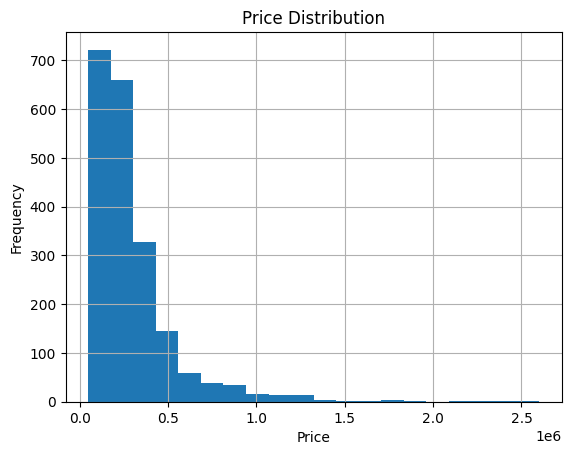

In [18]:
import matplotlib.pyplot as plt

# Assuming you have a Pandas Series named 'prices'
prices.hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


In [24]:
data.head(10)
data.sort_values(by='price').head(20)

,id,price,area,rooms,floor,storeys,bathroom_count,new_building,F_Furniture,F_Security,...,L_fuel,L_school,L_place_of_worship,L_music_school,L_university,L_kindergarten,L_bus_station,L_hospital,L_prison,L_stripclub
source,,,,,,,,,,,,,,,,,,,,,
bnakaran,d95881,48000.0,40.0,2.0,5.0,5.0,1.0,0,0,0,...,0,1,2,0,1,1,0,2,0,0
bnakaran,d34210,52000.0,40.0,2.0,1.0,11.0,1.0,0,0,0,...,0,2,1,1,1,2,0,1,0,0
bnakaran,d117089,52000.0,40.0,1.0,1.0,11.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
bnakaran,d50648,52000.0,40.0,1.0,6.0,10.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
myrealty,142547,53351.0,32.0,1.0,4.0,4.0,1.0,0,0,0,...,1,2,0,0,1,0,0,0,0,0
bnakaran,d1047,58080.0,44.0,1.0,4.0,10.0,1.0,0,0,0,...,0,3,0,1,1,3,0,3,0,0
bnakaran,d86405,59400.0,54.0,2.0,4.0,5.0,1.0,0,0,0,...,0,1,1,2,2,3,0,3,0,0
myrealty,136499,60000.0,43.0,1.0,5.0,5.0,1.0,0,1,0,...,1,1,0,0,0,1,1,3,0,0
bnakaran,d117331,63000.0,35.0,2.0,7.0,9.0,1.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
